## Summary

The table evaluator now provides:

1. **Basic Statistical Analysis** - Traditional metrics like correlation, mean/std comparison
2. **Advanced Statistical Analysis** - Wasserstein distance and MMD for sophisticated distribution comparison
3. **Privacy Analysis** - Existing privacy metrics for assessing data leakage
4. **Visual Analysis** - Comprehensive plotting capabilities
5. **Performance Optimization** - Automatic sampling for large datasets

### Key Features:

- **Automatic Warnings**: Alerts when datasets are large (>250,000 rows)
- **Sampling Support**: Optional sampling with configurable limits
- **Multiple Kernels**: RBF, Polynomial, and Linear kernels for MMD
- **Comprehensive Reporting**: Combined metrics with quality ratings and recommendations
- **Type Safety**: Full type hints for better development experience

### When to Use Each Method:

- **Basic Analysis**: Always start here for quick overview
- **Wasserstein Distance**: Good for detecting distributional differences
- **MMD**: Excellent for detecting complex, non-linear differences
- **Combined Analysis**: Use for comprehensive assessment with actionable recommendations

In [2]:
%load_ext autoreload
%autoreload 2

# Example Notebook: How to analyse synthetic data
This notebook will show, fairly compact, how to analyse the data that you have someone obtained.

In [3]:
from table_evaluator import TableEvaluator, load_data

In [4]:
real, fake = load_data('data/real_test_sample.csv', 'data/fake_test_sample.csv')

In [5]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,951892,3245,3878.0,13680.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2165
1,3547680,515,65.9,14898.6,CREDIT,UNKNOWN,INTEREST_CREDITED,2006
2,1187131,4066,32245.0,57995.5,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,2139
3,531421,1811,3990.8,23324.9,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,892
4,37081,119,12100.0,36580.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,654


In [6]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,13619.0,92079.0,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,4174.0,32470.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0,57608.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0,36258.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,6303.0,50975.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211


In [7]:
cat_cols = ['trans_type', 'trans_operation', 'trans_k_symbol']

In [8]:
evaluator = TableEvaluator(real, fake, cat_cols=cat_cols)

### We can do a numerical analysis

In [9]:
evaluator.evaluate(target_col='trans_type', notebook=False, verbose=False)

/Users/baukebrenninkmeijer/Developer/table-evaluator/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/baukebrenninkmeijer/Developer/table-evaluator/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Classifier F1-scores and their Jaccard similarities::
    real   fake
0 0.9533 0.9533

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.5655
nearest neighbor std                     0.3726

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0388
Column Correlation distance MAE   0.0296

Results:
                                                result
Basic statistics                                0.9940
Correlation column correlations                 0.9904
Mean Correlation between fake and real columns  0.6249
1 - MAPE Estimator results                      0.9533
Similarity Score                                0.8906


{'Basic statistics': 0.993984962406015,
 'Correlation column correlations': 0.9903611637604218,
 'Mean Correlation between fake and real columns': 0.6249459461580484,
 '1 - MAPE Estimator results': 0.9532839731695244,
 'Similarity Score': 0.8906440113735024}

### But we can also do a visual analysis

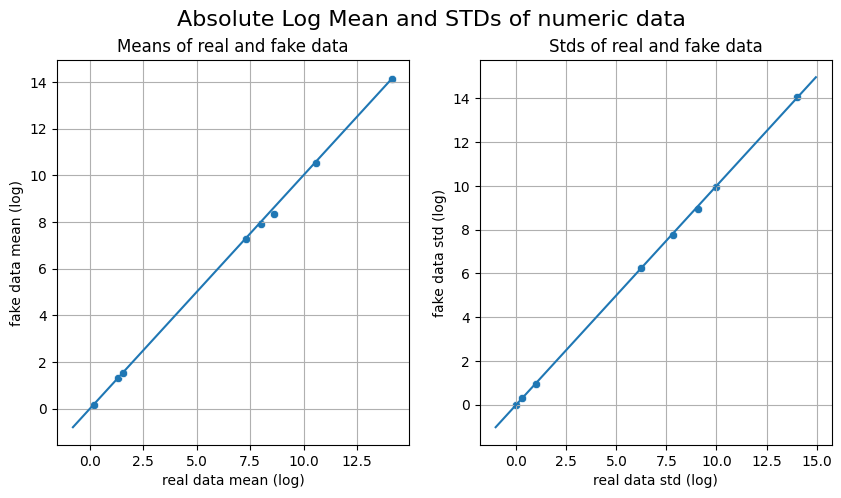

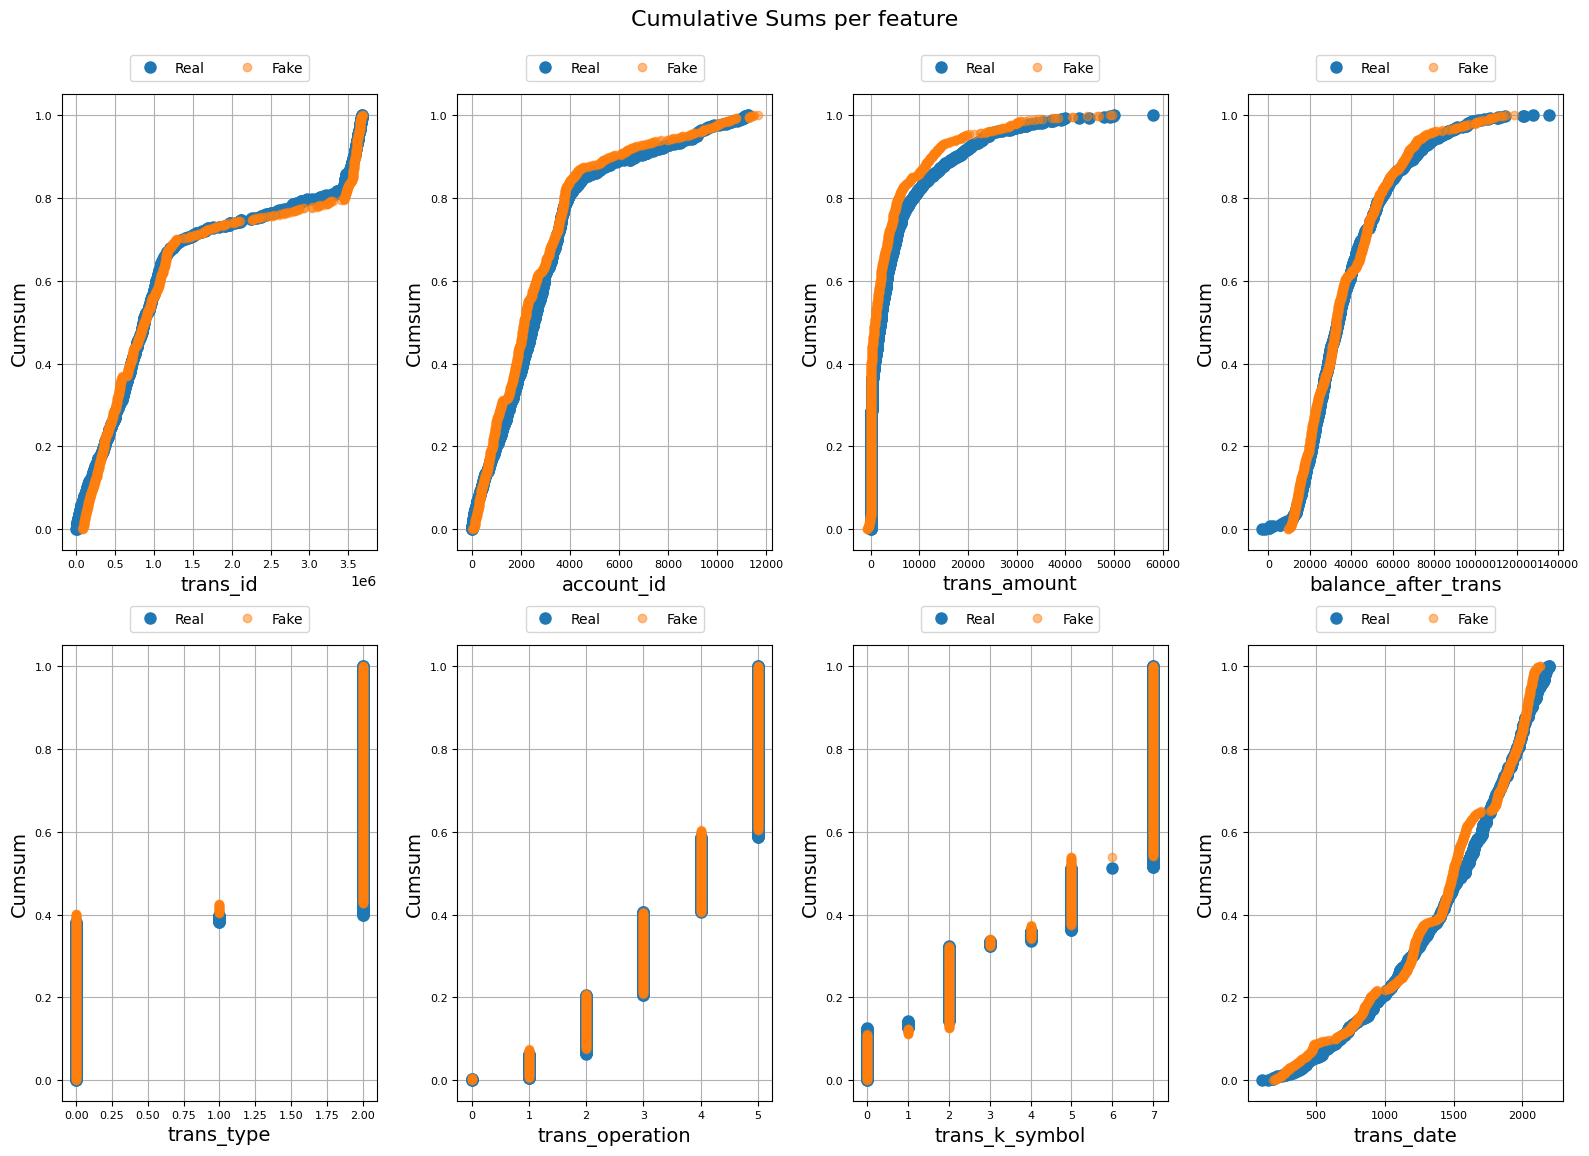

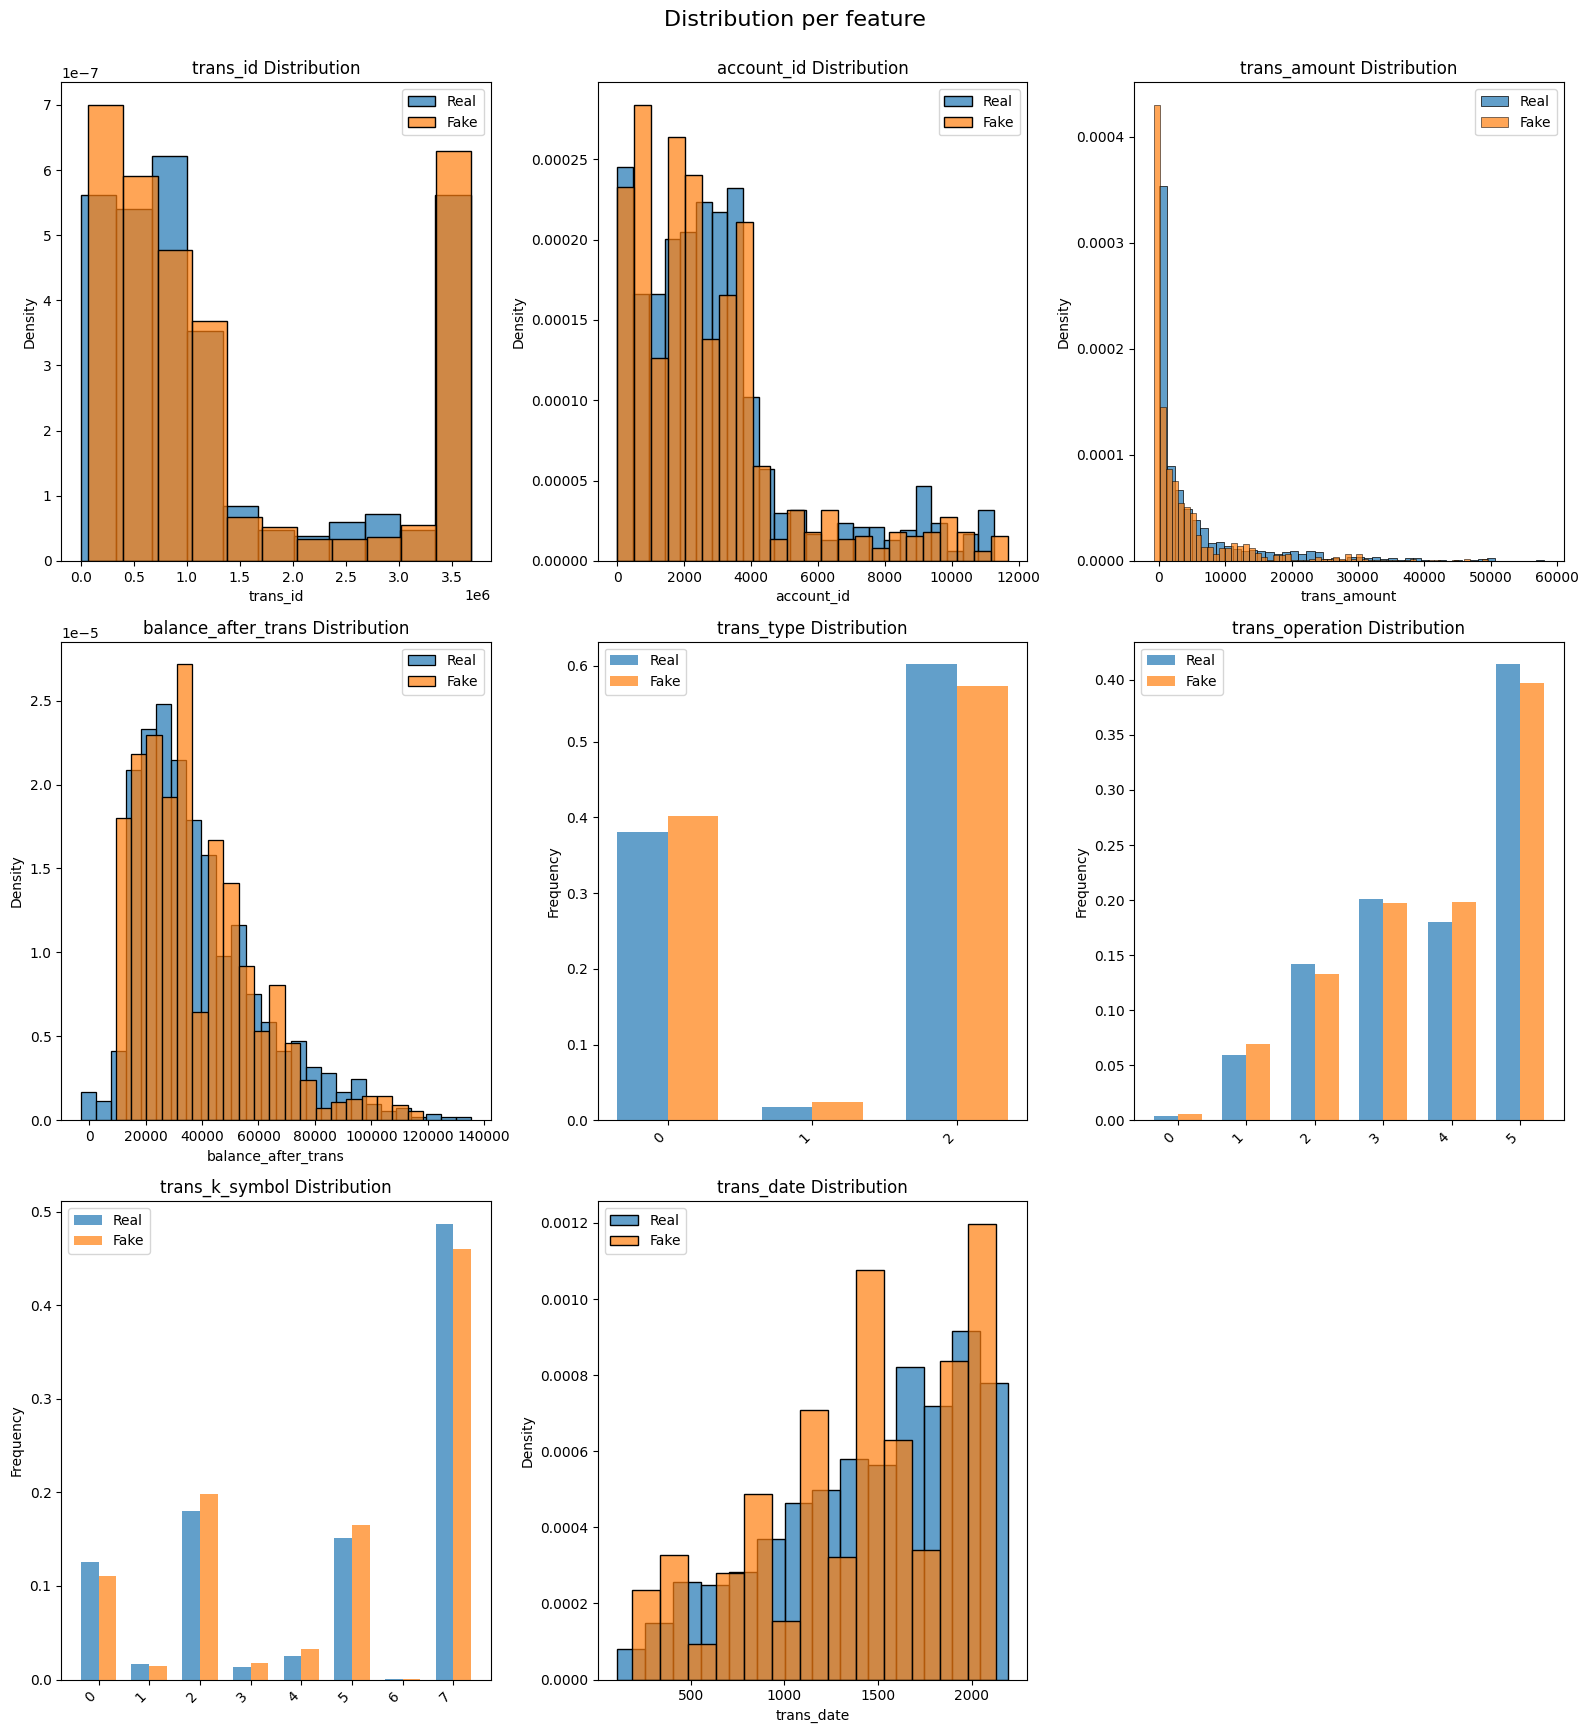

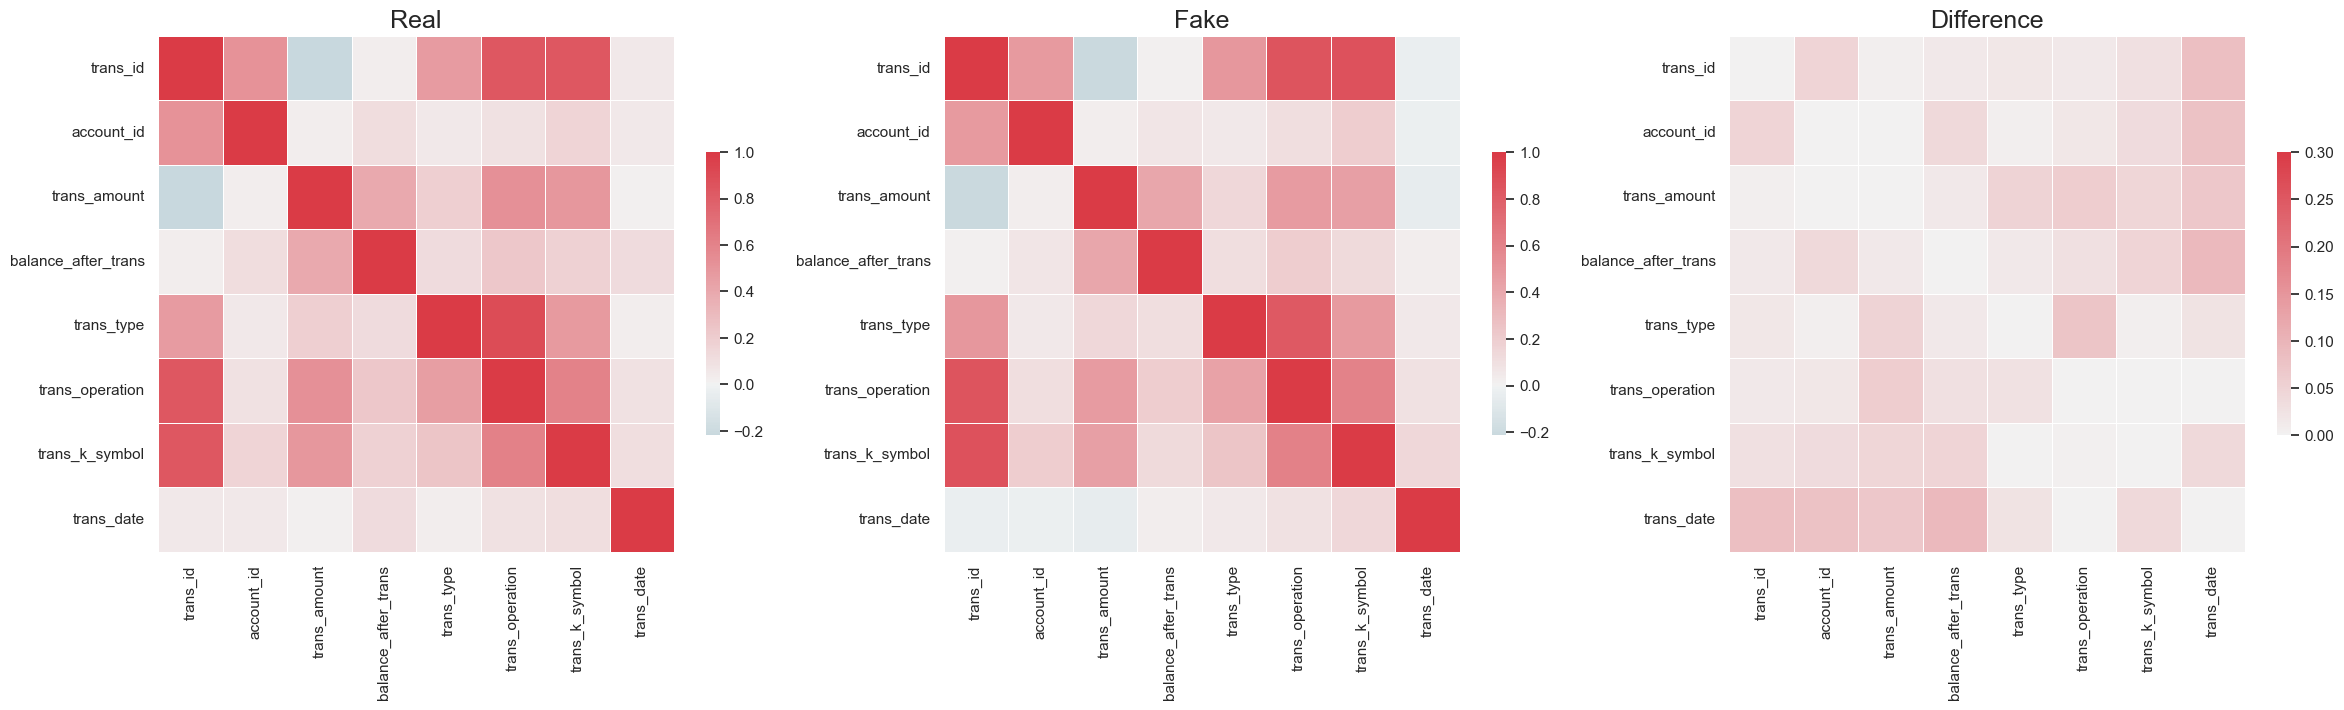

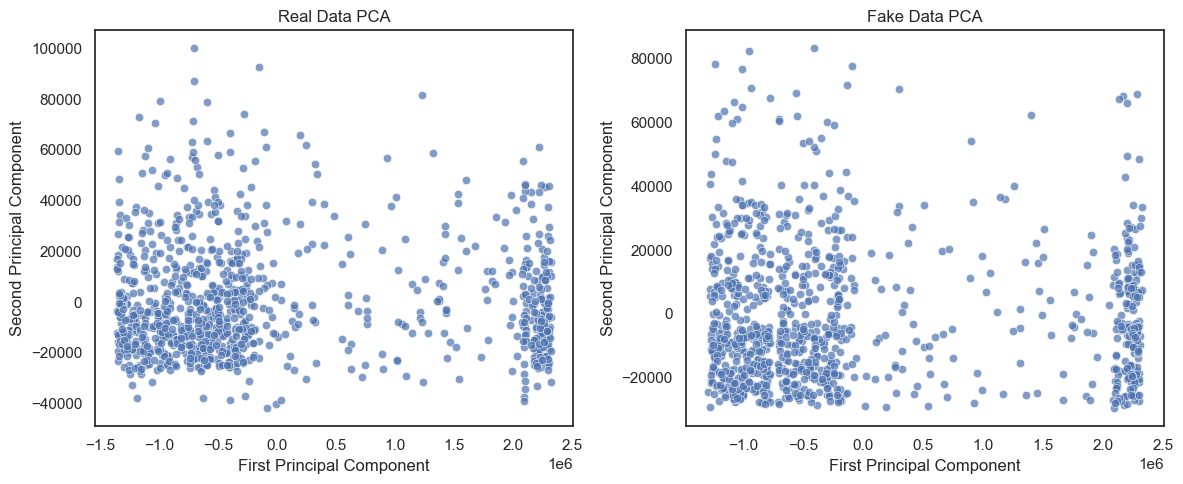

In [10]:
evaluator.visual_evaluation()

## Advanced Statistical Analysis

The table evaluator now includes advanced statistical methods for more sophisticated distribution comparison:

### 1. Wasserstein Distance (Earth Mover's Distance)
The Wasserstein distance provides a robust measure of the distance between two probability distributions.

In [11]:
# Import advanced statistical evaluator
from table_evaluator.evaluators.advanced_statistical import AdvancedStatisticalEvaluator

# Create advanced evaluator
advanced_evaluator = AdvancedStatisticalEvaluator(verbose=True)

# Get numerical columns for analysis
numerical_cols = evaluator.numerical_columns
print(f'Numerical columns: {numerical_cols}')

# Run Wasserstein distance analysis
wasserstein_results = advanced_evaluator.wasserstein_evaluation(real, fake, numerical_cols)

print(f'Wasserstein Quality Rating: {wasserstein_results["quality_metrics"]["quality_rating"]}')
print(f'Mean Wasserstein Distance: {wasserstein_results["quality_metrics"]["mean_wasserstein_p1"]:.4f}')
print(f'Distribution Similarity Score: {wasserstein_results["quality_metrics"]["distribution_similarity_score"]:.4f}')

Numerical columns: ['trans_id', 'account_id', 'trans_amount', 'balance_after_trans', 'trans_date']
Computing Wasserstein distances...
Wasserstein Quality Rating: Very Poor
Mean Wasserstein Distance: 10429.4194
Distribution Similarity Score: 0.0000


### 2. Maximum Mean Discrepancy (MMD)
MMD is a powerful kernel-based method for detecting distribution differences.

In [12]:
# Run MMD analysis with different kernels
mmd_results = advanced_evaluator.mmd_evaluation(
    real, fake, numerical_cols, kernel_types=['rbf', 'polynomial', 'linear']
)

if 'quality_metrics' in mmd_results:
    print(f'MMD Quality Rating: {mmd_results["quality_metrics"]["mmd_rating"]}')
    print(f'Mean MMD: {mmd_results["quality_metrics"]["mean_mmd"]:.6f}')
    print(
        f'Fraction of columns with significant differences: {mmd_results["quality_metrics"]["fraction_significant_differences"]:.2f}'
    )

# Show results for different kernels
if 'multivariate' in mmd_results:
    print('\nMultivariate MMD results by kernel:')
    for kernel, results in mmd_results['multivariate'].items():
        if 'error' not in results:
            print(f'  {kernel}: MMD² = {results["mmd_squared"]:.6f}, p-value = {results["p_value"]:.4f}')
            print(f'    Significant: {results["significant"]}')

# Show best kernel
if 'best_kernel' in mmd_results:
    best = mmd_results['best_kernel']
    print(f'\nBest kernel: {best["kernel"]} (discriminative power: {best["discriminative_power"]})')

Computing MMD with kernels: ['rbf', 'polynomial', 'linear']
MMD Quality Rating: Very Poor
Mean MMD: 538277000534605661470720.000000
Fraction of columns with significant differences: 0.33

Multivariate MMD results by kernel:
  rbf: MMD² = 0.001439, p-value = 0.0250
    Significant: True
  polynomial: MMD² = 0.000000, p-value = 1.0000
    Significant: False
  linear: MMD² = 0.000000, p-value = 1.0000
    Significant: False

Best kernel: rbf (discriminative power: Low)


### 3. Comprehensive Advanced Analysis
Combine all advanced methods for a complete assessment:

In [ ]:
# Run comprehensive advanced evaluation
comprehensive_results = advanced_evaluator.comprehensive_evaluation(real, fake, numerical_cols)

# Show combined metrics
combined = comprehensive_results['combined_metrics']
print(f'Overall Similarity Score: {combined["overall_similarity"]:.4f}')
print(f'Quality Consensus: {combined["quality_consensus"]}')
print(f'Wasserstein Rating: {combined["wasserstein_rating"]}')
print(f'MMD Rating: {combined["mmd_rating"]}')

# Show statistical significance
sig_info = combined['statistical_significance']
print('\nStatistical Significance:')
print(f'  Fraction of columns with significant differences: {sig_info["fraction_columns_different"]:.2f}')
print(f'  Interpretation: {sig_info["interpretation"]}')

# Show recommendations
print('\nRecommendations:')
for i, rec in enumerate(comprehensive_results['recommendations'], 1):
    print(f'  {i}. {rec}')

### 4. Working with Large Datasets

When working with large datasets (>250,000 rows), the advanced metrics can become computationally intensive. You can enable sampling to improve performance:

In [ ]:
# Example with sampling for large datasets
# This will automatically warn if dataset is large and suggest sampling

# Enable sampling for performance
sampling_results = advanced_evaluator.comprehensive_evaluation(
    real,
    fake,
    numerical_cols,
    enable_sampling=True,  # Enable sampling for large datasets
    max_samples=5000,  # Maximum samples per dataset
)

print('Sampling configuration:')
print('  Enable sampling: True')
print('  Max samples per dataset: 5000')
print('  Automatic warnings: Enabled for datasets >250,000 rows')
print(f'  Current dataset size: {len(real) + len(fake)} rows')

# For very large datasets, you can also configure individual methods
large_dataset_config = {
    'wasserstein_config': {
        'include_2d': False,  # Skip 2D analysis for speed
        'enable_sampling': True,
        'max_samples': 3000,
    },
    'mmd_config': {
        'kernel_types': ['rbf'],  # Use only RBF kernel for speed
        'include_multivariate': True,
        'enable_sampling': True,
        'max_samples': 3000,
    },
}

print('\nConfiguration for very large datasets:')
print('  - Wasserstein: 1D only, sampling enabled')
print('  - MMD: RBF kernel only, sampling enabled')
print('  - Max samples: 3000 per method')

### 5. Direct Access to Advanced Metrics

You can also use the advanced metrics directly for specific analysis:

In [ ]:
# Direct access to advanced metrics
from table_evaluator.advanced_metrics.mmd import (
    RBFKernel,
    mmd_column_wise,
    mmd_squared,
)
from table_evaluator.advanced_metrics.wasserstein import (
    wasserstein_distance_1d,
    wasserstein_distance_df,
)

# Example: Single column Wasserstein distance
if len(numerical_cols) > 0:
    col = numerical_cols[0]
    w_dist = wasserstein_distance_1d(real[col], fake[col])
    print(f'Wasserstein distance for {col}: {w_dist:.4f}')

# Example: MMD with custom kernel

rbf_kernel = RBFKernel(gamma=1.0)
if len(numerical_cols) >= 2:
    real_sample = real[numerical_cols[:2]].dropna().values
    fake_sample = fake[numerical_cols[:2]].dropna().values

    if len(real_sample) > 0 and len(fake_sample) > 0:
        mmd_value = mmd_squared(real_sample, fake_sample, rbf_kernel)
        print(f'MMD² between distributions: {mmd_value:.6f}')

# Example: Column-wise analysis
if len(numerical_cols) > 0:
    # Wasserstein distances for all numerical columns
    wass_distances = wasserstein_distance_df(real, fake, numerical_cols)
    print('\nWasserstein distances by column:')
    for _, row in wass_distances.iterrows():
        print(f'  {row["column"]}: {row["wasserstein_distance"]:.4f}')

    # MMD analysis for all columns
    mmd_column_results = mmd_column_wise(real, fake, numerical_cols)
    print('\nMMD analysis by column:')
    for _, row in mmd_column_results.iterrows():
        sig_mark = '***' if row['significant'] else ''
        print(f'  {row["column"]}: MMD² = {row["mmd_squared"]:.6f}, p = {row["p_value"]:.4f} {sig_mark}')